In [13]:
from java_parser import get_unit_test_files, get_target_files
from file_metrics import get_test_history, get_diff_of_file, get_added_lines_file
from matplotlib import pyplot as plt
import numpy as np
repo_path = "/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver"

In [2]:
all_test_files = get_unit_test_files(repo_path)
map_files = get_target_files(repo_path, all_test_files)
map_before, map_same, map_after = get_test_history(repo_path, map_files)

Total number of test files:  156
Total number of target files found:  133


In [3]:
print("Before: " + str(len(map_before)))
print("Same: " + str(len(map_same)))
print("After: " + str(len(map_after)))


test_date = map_before[0]['test_date']
target_date = map_before[0]['target_date']
print("Test date: " + str(test_date))
print("Target date: " + str(target_date))

Before: 1
Same: 119
After: 13
Test date: 2016-09-03 22:23:01+02:00
Target date: 2022-10-25 10:23:35+02:00


# Files where test are created before the target file

## Diff of the test file and the target file

In [30]:

def get_diffs_of_file(repo_path, pair_test_target):
    test_file = pair_test_target['test']
    target_file = pair_test_target['target']
    diffs_test = get_diff_of_file(repo_path, test_file)
    diffs_target = get_diff_of_file(repo_path, target_file)
    return {'test': diffs_test, 'target': diffs_target}

diffs_before = get_diffs_of_file(repo_path, map_before[0])
print(diffs_before['test'])

[{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '39b91eedd2e22dd8bda287170f0d1d8598975f8d', 'date': datetime.datetime(2023, 8, 1, 13, 33, 6, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'count': 5, 'maximum': 5, 'average': 5}, {'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '97dfd1c2b9deb15734d5e401807e55cd0498332a', 'date': datetime.datetime(2023, 2, 20, 10, 2, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'count': -94, 'maximum': -94, 'average': -94}, {'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': 'ee6aa7e11f24e802a33d8692ee8db5e9e8e9c842', 'da

In [5]:
print(diffs_before['test'][0])
print(diffs_before['target'][0])

{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '39b91eedd2e22dd8bda287170f0d1d8598975f8d', 'date': datetime.datetime(2023, 8, 1, 13, 33, 6, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'count': 5, 'maximum': 5, 'average': 5}
{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-util/src/main/java/org/eclipse/aether/util/FileUtils.java', 'commit': '17e2fdb5c748be96e4d32306ba7342fc2b5e944d', 'date': datetime.datetime(2023, 11, 22, 15, 5, 3, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'count': -26, 'maximum': -26, 'average': -26}


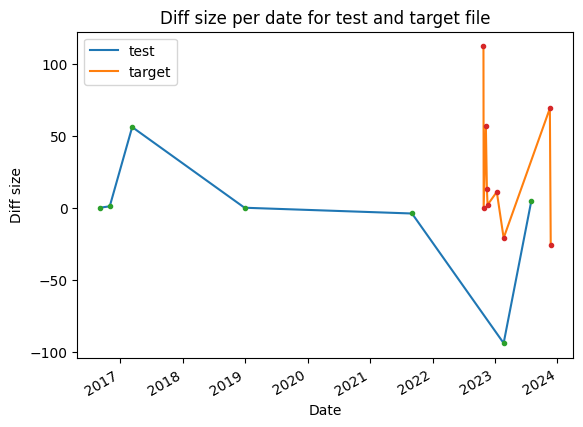

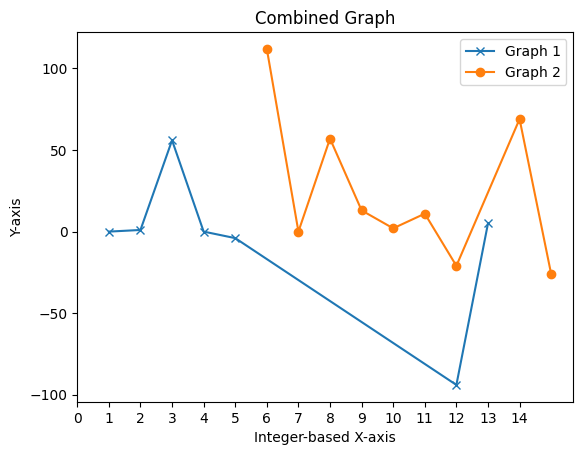

In [33]:
# barplot of diff size per date for each file
import matplotlib.pyplot as plt

def plot_diff_target_vs_test(diffs_file_test, diffs_file_target):
    
    test_file = [(x['date'], x['count']) for x in diffs_file_test]
    target_file = [(x['date'], x['count']) for x in diffs_file_target]

    test_file.sort(key=lambda x: x[0])
    target_file.sort(key=lambda x: x[0])

    test_file_dates = [x[0] for x in test_file]
    test_file_counts = [x[1] for x in test_file]

    target_file_dates = [x[0] for x in target_file]
    target_file_counts = [x[1] for x in target_file]

    plt.plot(test_file_dates, test_file_counts, label='test')
    plt.plot(target_file_dates, target_file_counts, label='target')

    # show data points
    plt.plot(test_file_dates, test_file_counts, 'o', markersize=3)
    plt.plot(target_file_dates, target_file_counts, 'o', markersize=3)

    plt.xlabel('Date')
    plt.ylabel('Diff size')

    plt.title('Diff size per date for test and target file')

    plt.legend()
    
    plt.gcf().autofmt_xdate()
    plt.show()

plot_diff_target_vs_test(diffs_before['test'], diffs_before['target'])


## Add lines to the test file vs the target file

In [59]:
def get_added_lines_pair(repo_path, pair_test_target):
    test_file = pair_test_target['test']
    target_file = pair_test_target['target']
    diffs_test = get_added_lines_file(repo_path, test_file)
    diffs_target = get_added_lines_file(repo_path, target_file)
    return {'test': diffs_test, 'target': diffs_target}

diffs_before = get_added_lines_pair(repo_path, map_before[0])
print(diffs_before['test'])

[{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '39b91eedd2e22dd8bda287170f0d1d8598975f8d', 'date': datetime.datetime(2023, 8, 1, 13, 33, 6, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'lines_count': 5, 'lines_added_count': 5, 'lines_added_max': 5, 'lines_added_avg': 5, 'lines_removed_count': 0, 'lines_removed_max': 0, 'lines_removed_avg': 0}, {'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '97dfd1c2b9deb15734d5e401807e55cd0498332a', 'date': datetime.datetime(2023, 2, 20, 10, 2, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'lines_count': 312, 'lines_added_count': 109, 'lines_added_max': 109, 'lines_added_avg': 109, 'lines_removed_count': 203, 'lines_removed_max': 203, 'lines_remo

In [40]:
def plot_lines_test_vs_target(metric_lines_test, metric_lines_target, metric):
      
    test_file = [(x['date'], x[metric]) for x in metric_lines_test]
    target_file = [(x['date'], x[metric]) for x in metric_lines_target]

    test_file.sort(key=lambda x: x[0])
    target_file.sort(key=lambda x: x[0])

    test_file_dates = [x[0] for x in test_file]
    test_file_counts = [x[1] for x in test_file]

    target_file_dates = [x[0] for x in target_file]
    target_file_counts = [x[1] for x in target_file]

    plt.plot(test_file_dates, test_file_counts, label='test')
    plt.plot(target_file_dates, target_file_counts, label='target')

    # show data points
    plt.plot(test_file_dates, test_file_counts, 'o', markersize=3)
    plt.plot(target_file_dates, target_file_counts, 'o', markersize=3)

    plt.xlabel('Date')
    plt.ylabel(f'{metric}')

    plt.title(f'{metric} per date for test and target file')

    plt.legend()
    
    plt.gcf().autofmt_xdate()
    plt.show()

diffs_before = get_added_lines_pair(repo_path, map_before[0])
print([diffs_before['test']])
print([diffs_before['target']])
plot_lines_test_vs_target(diffs_before['test'], diffs_before['target'], 'lines_added_count')
plot_test_vs_target_metric(diffs_before['test'], diffs_before['target'], 'lines_added_count')
plot_lines_test_vs_target(diffs_before['test'], diffs_before['target'], 'lines_removed_count')
plot_test_vs_target_metric(diffs_before['test'], diffs_before['target'], 'lines_removed_count')
plot_lines_test_vs_target(diffs_before['test'], diffs_before['target'], 'lines_count')
plot_test_vs_target_metric(diffs_before['test'], diffs_before['target'], 'lines_count')

diffs_before = get_diffs_of_file(repo_path, map_before[0])
plot_lines_test_vs_target(diffs_before['test'], diffs_before['target'], 'count')
plot_test_vs_target_metric(diffs_before['test'], diffs_before['target'], 'count')

In [38]:
def plot_test_vs_target_metric(metric_lines_test, metric_lines_target, metric):
      
    test_file = [(x['date'], x[metric]) for x in metric_lines_test]
    target_file = [(x['date'], x[metric]) for x in metric_lines_target]

    test_file.sort(key=lambda x: x[0])
    target_file.sort(key=lambda x: x[0])

    test_file_dates = [x[0] for x in test_file]
    test_file_counts = [x[1] for x in test_file]

    target_file_dates = [x[0] for x in target_file]
    target_file_counts = [x[1] for x in target_file]

    all_dates = sorted(list(set(test_file_dates + target_file_dates)))
    x_axis = np.arange(len(all_dates))

    fig, ax = plt.subplots()

    ax.plot([all_dates.index(date) + 1 for date in test_file_dates], test_file_counts, marker='x', label='Test')
    ax.plot([all_dates.index(date) + 1 for date in target_file_dates], target_file_counts, marker='o', label='Target')

    ax.set_xticks(x_axis)

    ax.set_xlabel('Integer-based X-axis')
    ax.set_ylabel(metric)

    ax.legend()

    plt.show()

[0.0, 2.203353178055327, 7.175510234981404, 32.09615033166669, 69.23541965611021, 85.08056564145492, 85.12509952565195, 85.61312047902538, 85.84273679249293, 85.994305515426, 88.0376267936321, 89.55851716639049, 95.70877145998061, 99.80771379252631, 100.0]


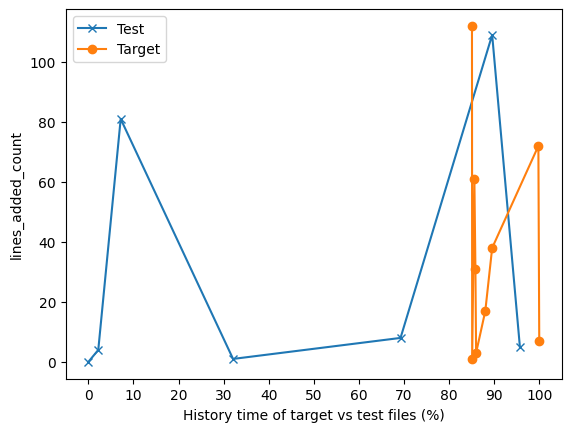

In [63]:
def plot_lines_test_vs_target_normalise_100(metric_lines_test, metric_lines_target, metric):
      
    test_file = [(x['date'], x[metric]) for x in metric_lines_test]
    target_file = [(x['date'], x[metric]) for x in metric_lines_target]

    test_file.sort(key=lambda x: x[0])
    target_file.sort(key=lambda x: x[0])

    test_file_dates = [x[0] for x in test_file]
    test_file_counts = [x[1] for x in test_file]

    target_file_dates = [x[0] for x in target_file]
    target_file_counts = [x[1] for x in target_file]

    all_dates = sorted(list(set(test_file_dates + target_file_dates)))
    min_value = min(all_dates)
    max_value = max(all_dates)
    normalized_x_axis = [((date - min_value) / (max_value - min_value)) * 100 for date in all_dates]
    print(normalized_x_axis)
    fig, ax = plt.subplots()

    ax.plot([normalized_x_axis[all_dates.index(date)] for date in test_file_dates], test_file_counts, marker='x', label='Test')
    ax.plot([normalized_x_axis[all_dates.index(date)] for date in target_file_dates], target_file_counts, marker='o', label='Target')

    x_ticks = np.arange(0, 101, 10)
    ax.set_xticks(x_ticks)

    ax.set_xlabel('History time of target vs test files (%)')
    ax.set_ylabel(metric)

    ax.legend()

    plt.show()

plot_lines_test_vs_target_normalise_100(diffs_before['test'], diffs_before['target'], 'lines_added_count')